# Introduction to Statistics - Python

In [144]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

## Learning Objectives
    - Understand Levels of Measurement
    - Understand the difference between descriptive statistics and inferential statistics
    - Calculate descriptive statistics
    - Understand distribution shapes and measurements
    - Understand and calculate covariance and correlation

## Lesson Guide
- [Part 1. Levels of Measurement](#Part1)
    - [Nominal](#nominal)
    - [Ordinal](#ordinal)
    - [Interval](#interval)
    - [Ratio](#ratio)
    - [Exercises](#lom)
- [Part 2. Descriptive Statistics vs. Inferential Statistics](#Part2)
- [Part 3. Descriptive Statistics](#Part3)
    - [Minimum](#min)
	- [Maximum](#max)
	- [Mean](#mean)
	- [Median](#median)
    - [Mode](#mode) 
	- [Count](#count)
    - [Unique](#unique)
    - [Interquartile Range](#iqr)
    - [Exercises](#exercises)
- [Part 4. Shapes of Distributions](#Part4)
    - [Measuring Skewness](#skew)
	- [Measuring Kurtosis](#kurt)
    - [Variance and Standard Deviation](#covstd)
- [Part 5. Covariance, Correlation and Causation](#Part5)
    - [Scalars, Vectors and Matrices](#svm)
    - [Vector Addition and Subtraction](#vas)
    - [Scalar Multiplication](#sm)
    - [Dot Product](#dp)
    - [Matrix Multiplication](#mm)
    - [Vector Norm](#vn)
    - [Covariance](#cov)
    - [Correlation](#corr)
    - [Thinking about Causation](#cause)

<a id="Part1"></a>
### Part 1. Levels of Measurement

<a id="nominal"></a>
**Nominal**
    - Elements within a nominal measure are:
        - all-inclusive
        - mutually exclusive
    - Examples:
        - Nationality
        - Social Security Number
    - Takeaway:
        - A nominal scale with two categories is dichotomous

<a id="ordinal"></a>        
**Ordinal**
    - Elements within an ordinal measure are:
        - all-inclusive
        - mutually exclusive
        - ordered, but the distance between two adjacent categories may vary.
    - Examples:
        - Airline ticket class
        - Likert scale (e.g. 1 - strongly disagree, 2 - disagree, 3 - neutral, 4 - agree, 5 - strongly agree)
    - Takeway:
        - Since the distance between two points varies, central tendency should not be measured with the mean.

<a id="interval"></a>
**Interval**
    - Elements within an interval measure are:
        - all-inclusive
        - mutually exclusive
        - ordered
        - constant distance between any two adjacent elements
        - arbitrary zero point
    - Examples:
        - Farenheight or Celsius
        - Time
    - Takeaway:
        - Without a true zero, it is (im)possible to compute ratios. 10 Celsius is not half as hot as 20 Celsius.

<a id="ratio"></a>
**Ratio**
     - Elements within a ratio measure are:
        - all-inclusive
        - mutually exclusive
        - ordered
        - constant distance between any two adjacent elements
        - non-arbitrary zero point
     - Examples:
        - Car prices
        - Height
        - Weight
     - Takeaway:
        - With a true zero, ratios can be calculated, which takes us from descriptive to inferential statistics

<a id="lom"></a>
### Part 1.1 Levels of Measurement Excercises

In [69]:
#Import some data that we can play with
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The Auto dataset has 397 observations on the following 9 variables:
 - **mpg:** miles per gallon
 - **cylinders:** Number of cylinders between 4 and 8
 - **displacement:** Engine displacement (cubic inches)
 - **horsepower:** Engine horsepower
 - **weight:** Vehicle weight (lbs.)
 - **acceleration:** Time to accelerate from 0 to 60 mph (sec.)
 - **year:** Model year (modulo 100)
 - **origin:** Origin of car (1. American, 2. European, 3. Japanese)
 - **name:** Vehicle name

In [124]:
# The dtypes method tells us how python is interpreting the 'type' of each column
data.dtypes
# Note that these types tell us how our computer is treating these values in memory, not how they will 
# be treated statistically.

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Excercise:
    What is the level of measurement for each column in the auto dataset? (Hint: be wary of measures that are actual ratios!)
    
    
    mpg
    cylinders
    displacement
    horsepower
    weight
    acceleration
    year
    origin
    name

#### A Diversion
What is **mpg's** level of measurement!?

Let's consider an analysis of fuel efficiency. If we're interested in the average distance that can be driven with a given amount of gas, we should analyze miles per gallon. But if we're interested in the average amount of gas required to drive a given distance, we should analyze gallons per mile. Both miles per gallon and gallons per mile are measurements of fuel efficiency, but they may yield quite different results in a statistical analysis, and there may be no clear reason to use one rather than the other. 

So how can we make inferences regarding fuel efficiency that do not depend on our choice between these two scales of measurement? If we recognize that both miles per gallon and gallons per mile are measurements of the same attribute (fuel efficiency) then a variety of *transformations* can rescale and normalize our metric. One such is a logrithimic transformation. Consider the following:

$$log(a/b) = log(a) - log(b)$$

Thus the logarithms of the scale scores (miles per gallon or gallons per mile) form an interval scale.

In [235]:
# create 2 mpg and 2 gpm metrics that are inverses of each other
mpg = np.array([20/2, 6/3])
gpm = np.array([2/20, 3/6])

array([ 10.,   2.])

In [236]:
# view these measures
print(mpg)
print(gpm)

[ 10.   2.]
[ 0.1  0.5]


In [232]:
# calculate the difference between each mpg measure and each gpm measure
print(mpg[0] - mpg[1])
print(gpm[0] - gpm[1])
# Note how the the differences are different even though the mpg and gpm measures are saying the same thing!

8.0
-0.4


In [237]:
# If we apply a logarithmic transformation to each measure, we'll normalize the scores and re-scale the differences 
# so they're in the same "units"
print(np.log10(mpg[0]) - np.log10(mpg[1]))
print(np.log10(gpm[0]) - np.log10(gpm[1]))

0.698970004336
-0.698970004336


#### Takeaway
Measurement theory shows that strong assumptions are required for certain statistics to provide meaningful information about reality. You should always think about the meaning of your data and question the assumptions behind your analysis (before somebody else does).

In [221]:
mpg = 20/2
gpm = 2/20

print(np.log10(20/2))
print(np.log10(20) - np.log10(2))

print(np.log10(2/20))
print(np.log10(2) - np.log10(20))

1.0
1.0
-1.0
-1.0


<a id="Part2"></a>
### Part 2. Descriptive Statistics vs. Inferential Statistics

Now that we know our data's levels of measurement, let's dig deeper into describing it. But first, let's clear up some terminology and distinguish between descriptive and inferential statistics.

 - **Descriptive statistics** are quantitative measures that describe or summarize features of a collection of information.
     - For example, the **mode** of prices paid last Tuesday for a latte in NW Washington, DC. <br><br>
 
 - **Statistical inference** is using descriptive statistics (from a sample) to deduce the properties of a probability distribution underlying a larger population.
     - For example, using the mode above to make an educated guess about the most common Latte price in SE Washington, DC. <br><br>

 - **Takeaway:** While descriptive statistics aim to summarize a sample, inferential statistics use descriptive statistics to learn about the population that the sample of data is thought to represent.
 
     - This *generally* means that descriptive statistics, unlike inferential statistics, are not developed on the basis of probability theory.
	


<a id="Part3"></a>
### Part 3. Descriptive Statistics
Common measures include:
- [Minimum](#min)
- [Maximum](#max)
- [Mean](#mean)
- [Median](#median)
- [Mode](#mode)
- [Count](#count)
- [Unique](#unique)
- [Interquartile Range](#iqr)

In [74]:
# We already have data to play with. This code will show us the top 5 rows.
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<a id="min"></a>
### 3.1 The Minimum
The smallest value within a range of values

In [75]:
# What's the lowest (worst) mpg?

# One way (using the built-in pandas method)
data.mpg.min()

# Another (using built-in python functions)
min(data.mpg, key=float)

# Yet another (using the same built-in python functions plus a generator expression)
min(float(f) for f in data.mpg)

9.0

In [76]:
#Bonus:  see the features of the car(s) with only 9 mpg
data[data.mpg == 9]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d


<a id="max"></a>
### 3.2 The Maximum
The largest value within a range of values

In [80]:
#based on the code above, how do you think you would find the highest mpg? Enter your code below:



In [79]:
# Replace the '9' below with the maximum mpg to print a table showing details about the most fuel-efficient autos

data[data.mpg == 9]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


<a id="mean"></a>
### 3.3 The (Arithmetic) Mean
The sum of *n* numbers divided by *n*.

$$ ( \frac{1}{n} \sum_{i=i}^{n} x_{i} ) = { {x^1 + x^2 +...+x^n} \over{n} }$$





In [40]:
# What is the mean mpg?

# One way (using the built-in pandas method)
data.mpg.mean()

# Another (using built-in python functions)
sum(data.mpg) / len(data.mpg)

# Yet another (using a function)
def getMean(num_list):
    return sum(num_list) / len(num_list)

getMean(data.mpg)

23.515869017632248

<a id="median"></a>
### 3.4 The Median
The value separating the higher half of a dataset from the lower half.

In [81]:
# What is the median mpg?

# One way (using the built-in pandas method)
data.mpg.median()

# Another way (using a function)
def getMedian(lst):
    n = len(lst)
    if n < 1:
        return None
    if n % 2 == 1:
        return sorted(lst)[n//2]
    else:
        return sum(sorted(lst)[n//2-1:n//2+1])/2.0

getMedian(data.mpg)

# Yet another way (using the median method from the numpy module)
np.median(data.mpg)

23.0

<a id="mode"></a>
### 3.5 The Mode
The most common element(s) in a dataset

In [82]:
# What is the mode of mpg?

# One way (using pandas)
data.mpg.mode()

# Another way (using the built-in max function and a key)
max(set(list(data.mpg)), key=list(data.mpg).count)

13.0

<a id="count"></a>
### 3.6 The Count
Count the number of elements in a dataset / list

In [83]:
# How many elements are in the mpg column of the dataframe?

# One way (using pandas)
data.mpg.count()

# Another way (using a built-in python function)
len(data.mpg)

# Yet Another way (using pandas)
data.mpg.shape[0]

397

<a id="unique"></a>
### 3.7 Unique
Identify the unique elements in a dataset / list

In [238]:
# What are the unique elements in the origin column of the dataframe?

# One way (using pandas)
data.origin.unique()

# Another way (using the built-in set function)
set(data.origin)

{1, 2, 3}

<a id="iqr"></a>
### 3.8 Interquartile Range (IQR)
The difference between the 75th and 25th percentiles, i.e. the first quartile subtracted from the third quartile.

In [99]:
# What are the 25th, 50th and 75th percentiles?

data.weight.quantile(q = [.25,.5,.75])

0.25    2223.0
0.50    2800.0
0.75    3609.0
Name: weight, dtype: float64

In [101]:
# What is another word for the 50th percentile?? Calcuate it, without using the quantile method, 
# for vehicle weight below:



In [103]:
############### Calculate the IQR (and an introduction to the object-oriented nature of python) #####################

# When we calculated the three quantiles above, we weren't able to subtract the 25th from the 75th percentile
# in order to get the IQR. We could do that by hand, but that's lame. Fortunately, python is an object-oriented
# language. That means we can create "objects", which may contain data, and use code to do things with them.

lowerQ = data.weight.quantile(q = .25)  # the '=' assigns the value of the right operand to the object on the left
upperQ = data.weight.quantile(q = .75)
IQR = upperQ - lowerQ  # now we can create another object using the first two we made
print(IQR)  # the print function is a built-in function that simple prints out an object.

1386.0


<a id="exercises"></a>
### 3.9 Exercises
Your turn to calculate some descriptive statistics!

In [104]:
# The columns method is a handy way to print column names from a data frame for reference
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
# What is the mode for cylinders?


In [ ]:
# What is the median weight?


In [ ]:
# What are the unique auto names?


In [ ]:
# What is the mean horsepower?


In [106]:
# What is the IQR for displacement?


In [108]:
# What is the range for year? Hint: Range is the difference between the lowest and highest values


In [109]:
# What is the difference between the median and mean accelerations?



# What do you think this difference tells you about the shape of this variable's distribution?

<a id="Part4"></a>
### 4 Shapes of Distributions
When graphed, the data in a set is arranged to show how the frequency of observations are distributed across the range of the dataset. These distributions show the spread (e.g. dispersion, variability, scatter) of the data. The spread may be stretched (covering a wider range) or squeezed (covering a narrower range).

The shape of a distribution is described by its number of peaks and by its possession of symmetry, its tendency to skew, or its uniformity. (Distributions that are skewed have more points plotted on one side of the graph than on the other.)

In [110]:
# This code will create some dummy data to help us visualize the ways in which we describe the shape of a distribution

norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

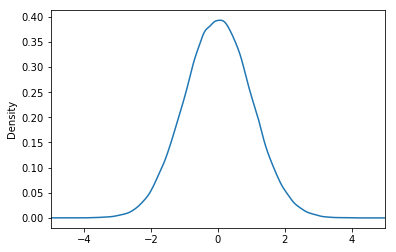

In [111]:
# A normal distribution
data_df["norm"].plot(kind="density", xlim=(-5,5))

# What can we say about the mean and the median in this distribution?

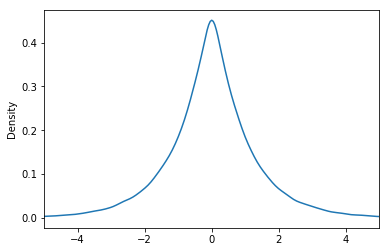

In [112]:
# a peaked distribution
data_df["peaked"].plot(kind="density", xlim=(-5,5))

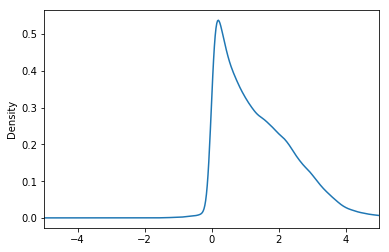

In [113]:
# A left/negative skewed distribution
data_df["skewed"].plot(kind="density", xlim=(-5,5))

When there is left/negative skew:
 - the mean is typically less than the median
 - the tail of the distribution is longer on the left hand side than on the right hand side
 - the median is closer to the third quartile than to the first quartile
 
The opposite is true for right/positive skew

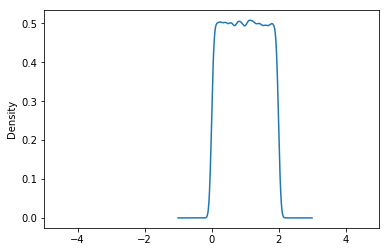

In [114]:
# An example of uniform skew
data_df["uniform"].plot(kind="density", xlim=(-5,5))

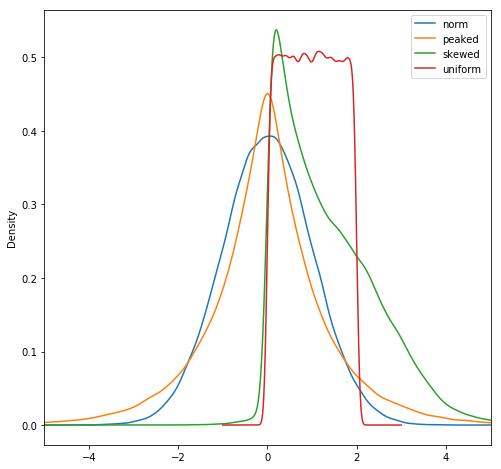

In [117]:
# Now let's see all the skews together
data_df.plot(kind="density",xlim=(-5,5), figsize = (8,8))  #note the figsize parameter to make this image bigger

<a id="skew"></a>
### 4.1 Measuring Skewness
Now let's check the skewness of each of these distributions. Here's the formula for skewness:

$$g_{1} = \frac{\sum_{i=1}^{N}(Y_{i} - \bar{Y})^{3}/N} {s^{3}}$$

            where Y¯ is the mean, s is the standard deviation, and N is the number of data points.

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric

In [118]:
data_df.skew()

norm       0.000496
peaked     0.002818
skewed     0.999237
uniform    0.003340
dtype: float64

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. 

<a id="kurt"></a>
### 4.2 Measuring Kurtosis
Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

$$\mbox{kurtosis} = \frac{\sum_{i=1}^{N}(Y_{i} - \bar{Y})^{4}/N} {s^{4}}  - 3$$

            where Y¯ is the mean, s is the standard deviation, and N is the number of data points.

In [120]:
data_df.kurt()

norm       0.001101
peaked     3.051754
skewed     1.263418
uniform   -1.197837
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis. Thus positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

<a id="covstd"></a>
### 4.2 Variance and Standard Deviation

**(Sample) Variance:** The squared sum of the deviations of an observation from its mean.
$$s^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{n-1}$$

 - where *n* is the number of samples, $x_i$ is each observation, and $\bar{x}$ is the sample mean

In most situations, you'll never know the true mean of a population. When dealing with extremely large populations, it's just not possible to count every object in the population. So we work with samples and make estimates.

**Standard Deviation:** The square root of the variance

$$s = \sqrt{s^2}$$

In [216]:
# In order to understand these formulas, let's calculate these measures by hand:

# First, we'll manually create some dummy data
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18],
                   'example2' : [75, 87, 49, 68, 75, 84, 98, 92],
                   'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
df

,example1,example2,example3
0,18,75,55
1,24,87,47
2,17,49,38
3,21,68,66
4,24,75,56
5,16,84,64
6,29,98,44
7,18,92,39


In [127]:
# In order to calcualte the variance of example1's observations, we'll need to know how many observations there are
# and the mean.

mean = df["example1"].mean()
n = df["example1"].count()
print('The mean is',mean,'and the number of observations is',n)

The mean is 20.875 and the number of observations is 8


In [129]:
# according to that variance formula above, we need to calculate the squared distance between each observation 
# and the mean. Let's do that below:
obs0 = (18 - mean)**2
obs1 = (24 - mean)**2
obs2 = (17 - mean)**2
obs3 = (21 - mean)**2
obs4 = (24 - mean)**2
obs5 = (16 - mean)**2
obs6 = (29 - mean)**2
obs7 = (18 - mean)**2

print(obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7)

8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625


In [131]:
# In the variance equation, the numerator is the sum of all of those squared differences:
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
print('The sum of squared differences is',numerator)

The sum of squared differences is 140.875


In [132]:
# Then we divide that numerator by (n-1)
denominator = n - 1
variance = numerator/denominator
print('The variance is', variance)

The variance is 20.125


In [134]:
#Phew! That took a lot of work and a lot of steps. If only there was a way to do that more quickly..
df.example1.var()

20.125

We know that this measure of variance tells us something about how spread out our data is, but what exactly is it telling us? Is that value high, low, can it be negative? What does it all mean?!

Well, we know that calculating variance involves squaring differences, so that means that the variance does not have the same unit of measurement as the original observations. For example, lengths measured in metres (m) have a variance measured in metres squared (m2).

So if we take the square root of the variance we'll get a number in the original units. That's the standard deviation!

In [140]:
# Calculating the standard deviation:
df.example1.std()

4.4860896112315904

How do we interpret the standard deviation?

Well, if we think the population distribution of our sample is normally distributed, then 68.27%, 95.45% and 99.73% of the values lie within one, two and three standard deviations of the mean, respectively.

In [152]:
Image(url = "https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG", width = 400, height = 400)

Even if we don't expect a normal distribution, [Chebyshev's inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) tells us that (usually) at least 75% of values must lie within two standard deviations of the mean and 89% within three standard deviations.

Finally, here's a little shortcut for everything we've done so far

In [153]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<a id="Part5"></a>
### Part 5. Covariance, Correlation and Causation (and an optional math review!)

<a id="svm"></a>
### Scalars, Vectors and Matrices

A **scalar** is a single number.

$$a$$

A **vector** is several numbers in sequence.

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

In [160]:
# Here's a vector in python (they're called arrays)
u = np.array([1, 3, 7])
u

array([1, 3, 7])

An m x n **matrix** is a rectangular array of numbers with m rows and n columns. Each number in the matrix is an entry. Entries can be denoted $a_{mn}$

$$A= \left[ \begin{array}{c}
a_{11} & a_{12} & ... & a_{1n}  \\
a_{21} & a_{22} & ... & a_{2n}  \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{array} \right]$$

In [161]:
# Since a matrix is just a collection of arrays, we can make one in python
m = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])
m

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

In [163]:
# We can do things to every element in an array
x = np.array([3,6,9,12])
x = x/3
x

array([ 1.,  2.,  3.,  4.])

<a id="vas"></a>
### Vector Addition and Subtraction
We can also do vector addition if the vectors are of equal dimensions:

$$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$$

In [165]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$$

(Subtraction is similar.)

In [166]:
v + w

array([2, 3, 8])

<a id="sm"></a>
### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$$ 2 \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2*1 \\
2*3 \\
2*7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$$

In [167]:
2*np.array([1, 3, 7])

array([ 2,  6, 14])

<a id="dp"></a>
### Dot Product
The **dot product** of two _n_-dimensional vectors is:

$$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $$

So, if:

$$\vec{v} = \left[ \begin{array}{c}
1&3&7 
\end{array} \right], 
\vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$$

Then:

$$ \vec{v} \cdot \vec{w} = 1*1 + 3*0 + 7*1 = 8 $$

In [168]:
v = np.array([1,3,7])
w = np.array([[1],[0],[1]])
v.dot(w)

array([8])

<a id="mm"></a>
### Matrix Multiplication
**Matrix multiplication:** If A is an *n × m* matrix and B is an *m × p* matrix, their matrix product AB is an *n × p* matrix, in which the m entries across a row of A are multiplied with the m entries down a columns of B and summed to produce an entry of AB

$$\matrix{A} = \left[ \begin{array}{c}
1&2&3\\
4&5&6
\end{array} \right],
\matrix{B} = \left[ \begin{array}{c}
7&8 \\
9&10 \\
11&12
\end{array} \right],
\matrix{AB} = \left[ \begin{array}{c}
58&64 \\
139&154
\end{array} \right]$$

In [169]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
A.dot(B)

array([[ 58,  64],
       [139, 154]])

<a id="vn"></a>
### Vector Norm
The **magnitude** of a vector $\vec{v} \in \mathbb{R}^{n}$ in is interpretable as its length in n-dimensional space, and is calculable via the Euclidean distance:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{v^Tv}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will see this often in machine learning as **least squares** and in two dimensional space can be intuitvaley thought of as the distance from the origin (0,0) to the point x. It's the Pythagorean theorem in other words.

In [172]:
# the length of d in the image below would be the vector norm of vector (x, y).
Image(url = "http://www.themathpage.com/alg/Alg_IMG/411.gif")

In [173]:
# and if x = 3 and y = 4...
np.linalg.norm(np.array([3,4]))

5.0

<a id="cov"></a>
### 5.1 Covariance
Covariance is a measure of the joint variability of two random variables. 

If the greater values of one variable correspond with the greater values of the other variable, and the same holds true for the lesser values, then covariance is positive. 

In the opposite case - when the greater values of one variable mainly correspond to the lesser values of the other -  then the covariance is negative. 

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance, however, is not easy to interpret (more on this later)

The sample covariance variables X and Y given N observations: 

$$CoV_{xy}=\frac{1}{N-1}\sum_{i=1}^{N}\left(  X_{i}-\bar{X} \right)  \left( Y_{i}-\bar{Y} \right)$$

In [177]:
# Let's calculate the covariance of these two variables:  example1 and example2
df[['example1', 'example2']]

,example1,example2
0,18,75
1,24,87
2,17,49
3,21,68
4,24,75
5,16,84
6,29,98
7,18,92


In [181]:
# and let's do it by hand
x_mean = df['example1'].mean()  #get the mean of example1
y_mean = df['example2'].mean()  #get the mean of example2
denominator = len(df['example1']) - 1   # n-1

In [185]:
x0 = 18 - x_mean
x1 = 24 - x_mean
x2 = 17 - x_mean
x3 = 21 - x_mean
x4 = 24 - x_mean
x5 = 16 - x_mean
x6 = 29 - x_mean
x7 = 18 - x_mean


y0 = 75 - y_mean
y1 = 87 - y_mean
y2 = 49 - y_mean
y3 = 68 - y_mean
y4 = 75 - y_mean
y5 = 84 - y_mean
y6 = 98 - y_mean
y7 = 92 - y_mean


numerator = (x0*y0) + (x1*y1) + (x2*y2) + (x3*y3) + (x4*y4) + (x5*y5) + (x6*y6) + (x7*y7)
covariance = numerator / denominator
print('The covariance of x and y is', covariance)

The covariance of x and y is 33.07142857142857


In [184]:
# let's check our work (and calculate all the covariances with a covariance matrix)
# The covariance of example1 and example2 is found at their intersection in the matrix
df.cov()

,example1,example2,example3
example1,20.125000,33.071429,-5.982143
example2,33.071429,238.571429,-9.500000
example3,-5.982143,-9.500000,116.125000


So what does a covariance of 33.07 tell us? It's positive, so we know that the greater values of example1 correspond with the greater values of example2. But how closely do they correspond? What's the magnitude of this relationship?

Covariance can't tell us that...

Covariance is blind to, but influenced by, units of measurement. This means we can determine whether a relationship is positive or negative, but we can't measure the degree to which the variables move together. Moreover, we can't compare the covariance of one pair of variables to that of another. We need a standard unit of measurement to do these things.

In [217]:
# Change the values in the array below and then execute this cell to see how the covariance changes 
x = np.array([[0, 1, 2],
              [2, 1, 0]])

# The covariance scores appear in the bottom-left to top-right diagonal 
print(np.cov(x))

[[ 1. -1.]
 [-1.  1.]]


<a id="corr"></a>
### 5.2 Correlation
**Correlation** is a standardized measure of covariance and tells you how closely two variables move together. The correlation measurement, called a correlation coefficient, will always take on a value between 1 and – 1:
 - If the correlation coefficient is 1, the variables have a perfect positive correlation. This means that if one variable moves a given amount, the second moves proportionally in the same direction. A positive correlation coefficient less than one indicates a less than perfect positive correlation, with the strength of the correlation growing as the number approaches one.
 - If correlation coefficient is 0, no relationship exists between the variables. If one variable moves, you can make no predictions about the movement of the other variable; they are uncorrelated.
 - If correlation coefficient is –1, the variables are perfectly negatively correlated (or inversely correlated) and move in opposition to each other. If one variable increases, the other variable decreases proportionally. A negative correlation coefficient greater than –1 indicates a less than perfect negative correlation, with the strength of the correlation growing as the number approaches –1.

$$r_{xy}=\frac{CoV_{xy}}{s_{x}s_{y}}$$

                                               where s is standard deviation

**Knowledge Check**:  What are we using to *standardize* the covariance measure?

In [213]:
sx = df['example1'].std()  # calculate standard deviation of example1
sy = df['example2'].std()  # calculate standard deviation of example2

r = covariance / (sx * sy)  # remember we solved for covariance ealier and saved it as `covariance`
print(r)

0.477282812550893


In [215]:
# And we can confrim that math by looking at the correlation matrix, where example 1 and example 2 intersect
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


<a id="cause"></a>
### 5.3 Thinking about Causation

To recap, what is correlation in your own words?

In your own words, what is causation?

How would you describe the relationship between correlation and causation?

Check this out:
http://www.tylervigen.com/spurious-correlations